## Use Google API to search shortest paths
1. Select a city with only one transit service (no need)
2. Select a set of origins/destinations (e.g., 5 places)
3. Query the shortest journey time between these places

In [1]:
%load_ext autoreload
%autoreload 2

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [2]:
import googlemaps
from datetime import datetime
import dotenv
import os
import json
import pandas as pd

import google_map as gm

In [3]:
places_lst = [
    (40.807722, -73.96411),
    (40.791642, -73.964696),
    (40.852462, -73.828121),
    (40.8883, -73.830834),
    (40.889248, -73.898583),
    (40.754203, -73.942836),
    (40.680429, -73.843853),
    (40.718383, -74.00046),
    (40.616622, -74.030876),
    (40.702566, -73.816859)
]

Start query for google map...

- Note that Google API only supports transit information for a very recent day.

In [4]:
dotenv.load_dotenv()
MAP_API = os.getenv('MAP_API')
t0 = pd.to_datetime("2024-12-17, 10:00:00").tz_localize("America/New_York")
T0 = 10 * 60

In [5]:
dur, dur_res = gm.get_transit_time(
    MAP_API, 
    "40.807722, -73.96411", 
    "40.791642, -73.964696",
    t0=t0
)

Travel time from 40.807722, -73.96411 to 40.791642, -73.964696 is 19.90 minutes.


In [8]:
travel_durations = gm.query_all_times(
    coords=places_lst,
    t0=t0,
    MAP_API=MAP_API
)

Travel time from 40.807722,-73.96411 to 40.791642,-73.964696 is 19.90 minutes.
Travel time from 40.807722,-73.96411 to 40.852462,-73.828121 is 63.80 minutes.
Travel time from 40.807722,-73.96411 to 40.8883,-73.830834 is 67.17 minutes.
Travel time from 40.807722,-73.96411 to 40.889248,-73.898583 is 30.77 minutes.
Travel time from 40.807722,-73.96411 to 40.754203,-73.942836 is 38.50 minutes.
Travel time from 40.807722,-73.96411 to 40.680429,-73.843853 is 63.00 minutes.
Travel time from 40.807722,-73.96411 to 40.718383,-74.00046 is 34.00 minutes.
Travel time from 40.807722,-73.96411 to 40.616622,-74.030876 is 67.00 minutes.
Travel time from 40.807722,-73.96411 to 40.702566,-73.816859 is 55.50 minutes.
Travel time from 40.791642,-73.964696 to 40.807722,-73.96411 is 15.08 minutes.
Travel time from 40.791642,-73.964696 to 40.852462,-73.828121 is 63.55 minutes.
Travel time from 40.791642,-73.964696 to 40.8883,-73.830834 is 67.25 minutes.
Travel time from 40.791642,-73.964696 to 40.889248,-73.

In [9]:
travel_durations = [round(td, 2) for td in travel_durations]
print(travel_durations)
print(len(travel_durations))

[19.9, 63.8, 67.17, 30.77, 38.5, 63.0, 34.0, 67.0, 55.5, 15.08, 63.55, 67.25, 44.27, 33.0, 56.5, 31.0, 67.0, 45.5, 54.13, 55.5, 37.63, 62.23, 52.5, 93.5, 57.0, 94.5, 74.0, 64.5, 62.37, 36.67, 66.13, 59.87, 99.37, 63.87, 102.87, 84.37, 26.05, 42.05, 61.35, 80.03, 65.55, 86.05, 56.05, 89.05, 74.05, 34.0, 22.0, 63.63, 58.17, 62.27, 56.0, 24.5, 55.0, 21.5, 58.5, 54.0, 103.63, 98.67, 86.77, 59.5, 42.35, 55.0, 43.43, 34.12, 30.12, 64.13, 67.67, 62.38, 28.5, 39.85, 39.5, 45.5, 64.5, 63.0, 103.63, 99.17, 92.77, 60.0, 56.5, 40.12, 79.0, 53.5, 45.0, 79.13, 89.17, 76.27, 23.0, 33.02, 45.5, 80.5]
90


## Task: run it using GTFS...

In [10]:
import os
import sys
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import itertools

# import my own modules
sys.path.append("..")
from script.GTFSGraph import GTFSGraph
import script.gtfs_controller as gtfs
import script.analysis.geo_analysis as geo_analysis

2024-12-17 23:31:13.694 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-17 23:31:14.030 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [11]:
from gtfs_map import (
    graph_query_all_times,
    plot_performance,
    get_sel_ids,
    analyze_od_tt
)

Download GTFS from website:
- e.g., https://mobilitydatabase.org/

In [16]:
obj = gtfs.GTFSController(root_dir="../GTFS_inputs/NY_2024_1")

self.root_dir ../GTFS_inputs/NY_2024_1
fns ['../GTFS_inputs/NY_2024_1/transfers.txt', '../GTFS_inputs/NY_2024_1/agency.txt', '../GTFS_inputs/NY_2024_1/calendar_dates.txt', '../GTFS_inputs/NY_2024_1/stop_times.txt', '../GTFS_inputs/NY_2024_1/shapes.txt', '../GTFS_inputs/NY_2024_1/trips.txt', '../GTFS_inputs/NY_2024_1/stops.txt', '../GTFS_inputs/NY_2024_1/calendar.txt', '../GTFS_inputs/NY_2024_1/routes.txt']


In [17]:
sel_sids = get_sel_ids(obj, t0)

the date for analysis: 2024-12-17
after 'calendar.txt': 1
after 'calendar_dates.txt': 1


In [18]:
network_config_info = {
    "date": t0,
    "bw_mile": 0.5,
    "walk_speed": 3,
    "service_id": sel_sids
}

# do not build network for multiple times...
obj, stops = gtfs.build_network(
    network_config_info,
    GTFS_OBJ=obj,
    GRAPH_OBJ=GTFSGraph(),
)

num of stop ids:  991
filt sum: 991
total number of stops: (991, 9)
num. of nodes: 981033
num. of edges: 4837774


In [24]:
%%time
ttt_lst, tts_moving_lst = graph_query_all_times(
    obj = obj,
    stops = stops,
    coords = places_lst,
    depart_min = T0,
    cutoff=1000,
)

..........................................................................................
CPU times: user 6.22 s, sys: 128 ms, total: 6.35 s
Wall time: 6.34 s


In [25]:
ttt_lst = [round(tt, 2) for tt in ttt_lst]
print(ttt_lst)

[10.2, 60.26, 57.3, 24.5, 28.41, 60.62, 29.75, 63.73, 49.91, 15.08, 59.69, 49.46, 32.48, 19.7, 54.43, 21.6, 53.36, 40.7, 48.26, 45.66, 48.06, 60.66, 44.87, 83.92, 49.6, 85.84, 65.0, 57.6, 53.1, 51.36, 62.13, 58.06, 94.02, 61.6, 99.83, 79.56, 21.0, 25.1, 62.18, 59.02, 40.74, 75.34, 41.5, 77.25, 62.24, 23.5, 20.7, 58.16, 56.66, 45.94, 54.1, 19.2, 53.55, 21.5, 52.52, 49.02, 90.79, 95.99, 75.02, 47.31, 33.6, 53.58, 39.92, 23.8, 21.3, 58.6, 57.0, 46.4, 19.56, 37.49, 37.23, 39.1, 62.65, 57.15, 91.61, 97.11, 85.25, 54.47, 54.22, 36.0, 73.44, 52.25, 43.2, 81.66, 86.76, 74.44, 25.7, 54.61, 45.26, 77.77]


In [26]:
tts_moving_lst = [round(tt, 2) for tt in tts_moving_lst]
print(tts_moving_lst)

[4.2, 51.26, 48.3, 21.5, 20.41, 52.62, 23.75, 52.73, 41.91, 11.08, 53.69, 45.46, 32.48, 15.7, 50.43, 19.6, 47.36, 36.7, 43.26, 40.66, 41.06, 54.66, 37.87, 76.92, 43.6, 74.84, 59.0, 46.6, 44.1, 44.36, 53.13, 53.06, 88.02, 56.6, 89.83, 74.56, 21.0, 25.1, 58.18, 55.02, 35.74, 75.34, 40.5, 68.25, 57.24, 21.5, 13.7, 49.16, 53.66, 39.94, 49.1, 16.2, 47.55, 20.5, 49.52, 47.02, 85.79, 91.99, 72.02, 42.31, 31.6, 50.58, 36.92, 21.8, 19.3, 52.6, 56.0, 44.4, 16.56, 34.49, 31.23, 37.1, 49.65, 45.15, 80.61, 86.11, 72.25, 45.47, 44.22, 28.0, 62.44, 41.25, 35.2, 68.66, 73.76, 58.44, 18.7, 41.61, 37.26, 64.77]


In [27]:
print(travel_durations)

[19.9, 63.8, 67.17, 30.77, 38.5, 63.0, 34.0, 67.0, 55.5, 15.08, 63.55, 67.25, 44.27, 33.0, 56.5, 31.0, 67.0, 45.5, 54.13, 55.5, 37.63, 62.23, 52.5, 93.5, 57.0, 94.5, 74.0, 64.5, 62.37, 36.67, 66.13, 59.87, 99.37, 63.87, 102.87, 84.37, 26.05, 42.05, 61.35, 80.03, 65.55, 86.05, 56.05, 89.05, 74.05, 34.0, 22.0, 63.63, 58.17, 62.27, 56.0, 24.5, 55.0, 21.5, 58.5, 54.0, 103.63, 98.67, 86.77, 59.5, 42.35, 55.0, 43.43, 34.12, 30.12, 64.13, 67.67, 62.38, 28.5, 39.85, 39.5, 45.5, 64.5, 63.0, 103.63, 99.17, 92.77, 60.0, 56.5, 40.12, 79.0, 53.5, 45.0, 79.13, 89.17, 76.27, 23.0, 33.02, 45.5, 80.5]


(0.0, 120.0)

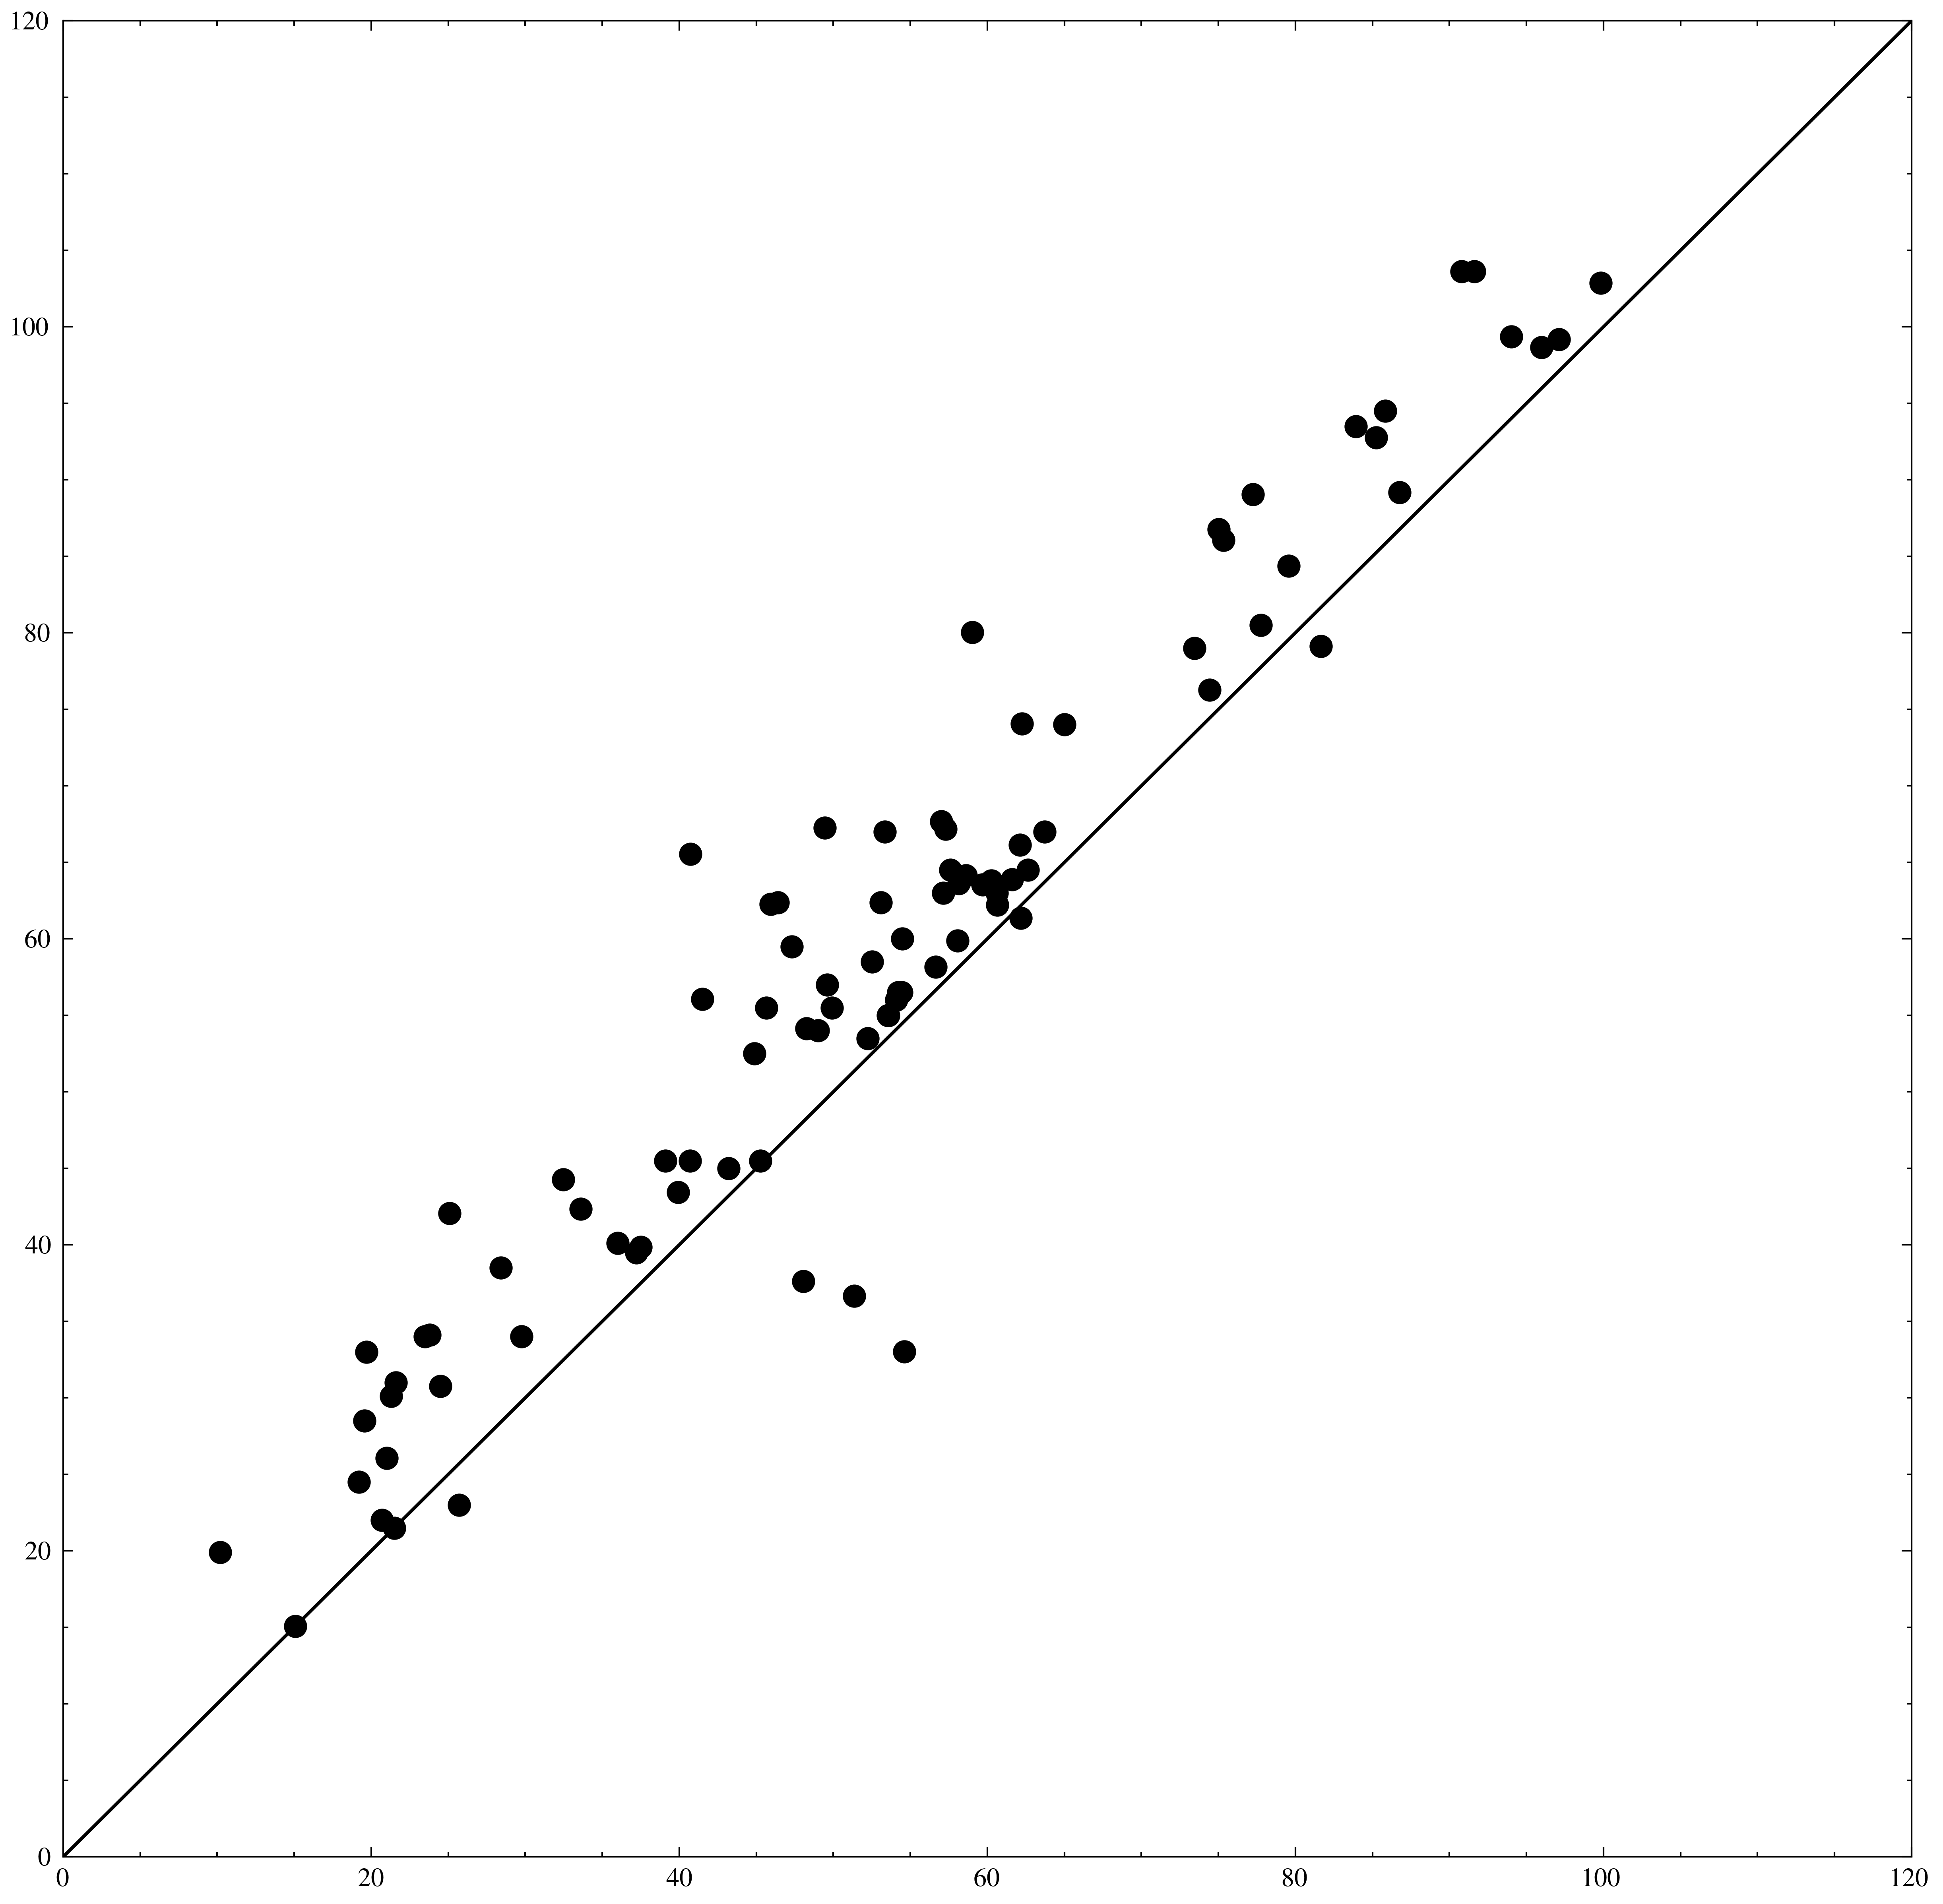

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

ax.scatter(ttt_lst, travel_durations, label="NY MTC")
ax.axline([0, 0], [120, 120], color="black")
ax.set_xlim(0, 120)
ax.set_ylim(0, 120)

### query travel time

In [29]:
from sklearn.metrics import (
    root_mean_squared_error, 
    mean_absolute_error,
    mean_absolute_percentage_error,
)

In [30]:
print(root_mean_squared_error(travel_durations, ttt_lst))
print(mean_absolute_error(travel_durations, ttt_lst))
print(mean_absolute_percentage_error(travel_durations, ttt_lst))

8.801393513403305
7.047444444444444
0.13807671703495977


In [31]:
# import pickle

# case_name = "ny_mta"

# with open(f"results/{case_name}_google.pkl", "wb") as file:
#     pickle.dump(travel_durations, file)

# with open(f"results/{case_name}_gtfs.pkl", "wb") as file:
#     pickle.dump(ttt_lst, file)